In [ ]:
# Load the dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
 
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=100)
X_train[0:4,:]

array([[5.5, 2.4, 3.7, 1. ],
       [5.7, 2.8, 4.1, 1.3],
       [6. , 2.2, 5. , 1.5],
       [4.8, 3. , 1.4, 0.1]])

In [ ]:
from sklearn import linear_model
from scipy.special import expit
 
model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

In [ ]:
# magic code
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
pca.fit(iris.data)
 
# Transofm the iris data to just 2 dimensions
iris_red = pca.transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(iris_red, iris.target, test_size=0.2, random_state=100)
X_train[0:4,:]

array([[-0.18962247, -0.68028676],
       [ 0.29900084, -0.34889781],
       [ 1.30079171, -0.76114964],
       [-2.78610927, -0.235112  ]])

In [ ]:
# Now, let's fit the model with just these 2 variables.
model_red = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

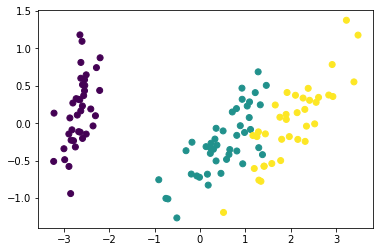

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)

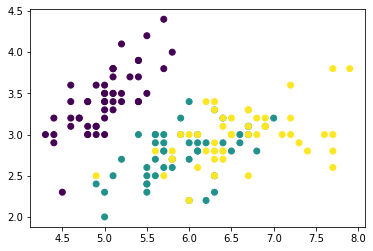

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.scatter(iris.data[:,0],iris.data[:,1],c = iris.target)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
 
np.random.seed(0)
 
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

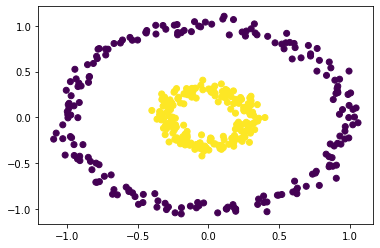

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [ ]:
pca = KernelPCA(n_components = 1)
pca.fit(X)
new_data_kernel = pca.transform(X)

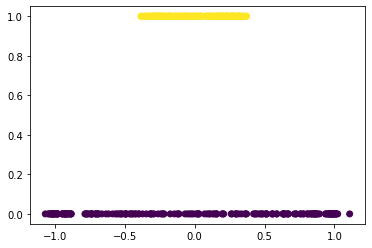

In [ ]:
plt.scatter(new_data_kernel,y,c=y)

In [27]:
import pickle as pk
pk.dump(pca.fit, open("pca.pkl","wb"))

In [ ]:
# later reload the pickle file
pca_reload = pk.load(open("pca.pkl",'rb'))
result_new = pca_reload .transform(X)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [24]:
#knn

knn_clf = KNeighborsClassifier(n_neighbors=9)
knn_clf.fit(X_train,y_train)

y_pred = knn_clf.predict(X_test)

accuracy_knn=round(accuracy_score(y_test,y_pred),3)
print(accuracy_knn)

0.967


In [32]:
filename = 'knn.sav'
pk.dump(knn_clf, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open('knnpickle_file', 'rb'))
result = loaded_model.predict(X_test) 